# Preparation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
plt.rcParams["figure.figsize"] = (12,8)

import warnings
warnings.filterwarnings('ignore')

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kenyon, Mrs. Frederick R (Marion)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
pd.isnull(train_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
clean_train_df = train_df[['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
clean_train_df['Sex'] = clean_train_df['Sex'].map({'female': 1, 'male': 0})
mean_age = clean_train_df['Age'].mean()
std_age = clean_train_df['Age'].std()
count_nan_age = pd.isnull(train_df).sum()['Age']
rand_1 = np.random.randint(mean_age - std_age, mean_age + std_age, size = count_nan_age)
clean_train_df["Age"][np.isnan(clean_train_df["Age"])] = rand_1
clean_train_df['Embarked'] = clean_train_df['Embarked'].fillna('S')
clean_train_df['Embarked'] = clean_train_df['Embarked'].map({'S': 2, 'C': 0, 'Q': 1})

In [8]:
clean_train_df.describe()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.383838,0.352413,29.652267,0.523008,0.381594,32.204208,1.536476
std,0.836071,0.486592,0.477990,13.585292,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,20.750000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,0.000000,0.000000,28.500000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


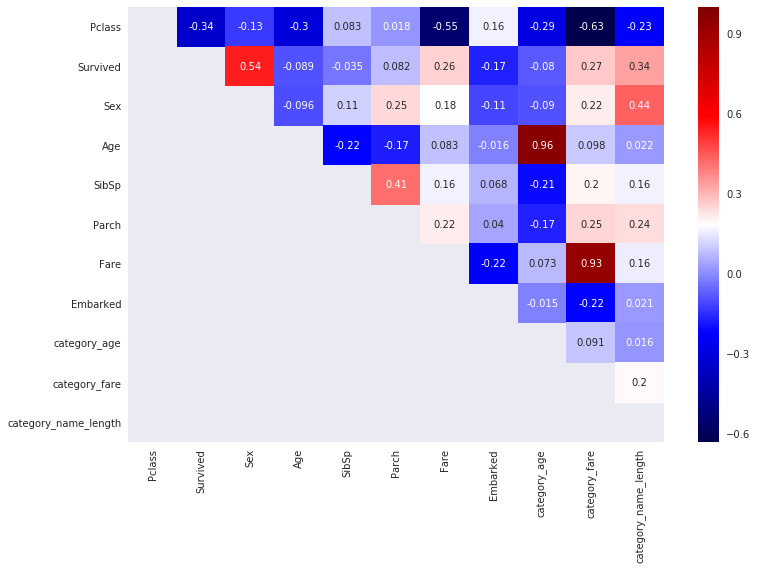

In [21]:
# heatmap correlation to 'Survived'
train_corr = clean_train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(train_corr, mask=np.tril(np.ones(train_corr.shape)), annot=True, cmap='seismic')

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


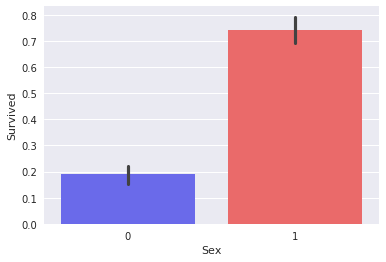

In [10]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=clean_train_df, palette='seismic')
print("Percentage of females who survived:", clean_train_df["Survived"][clean_train_df["Sex"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", clean_train_df["Survived"][clean_train_df["Sex"] == 0].value_counts(normalize = True)[1]*100)

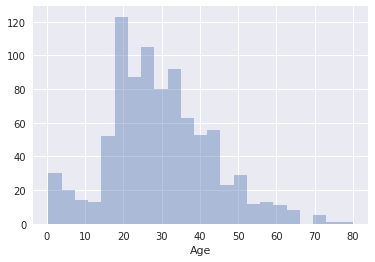

In [11]:
sns.distplot(clean_train_df['Age'], hist=True, kde=False)

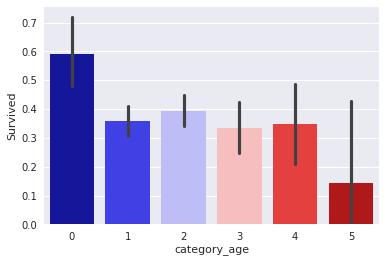

In [12]:
clean_train_df['category_age'] = pd.cut(clean_train_df['Age'], bins=6, labels=False)
sns.barplot(x="category_age", y="Survived", data=clean_train_df, palette='seismic')

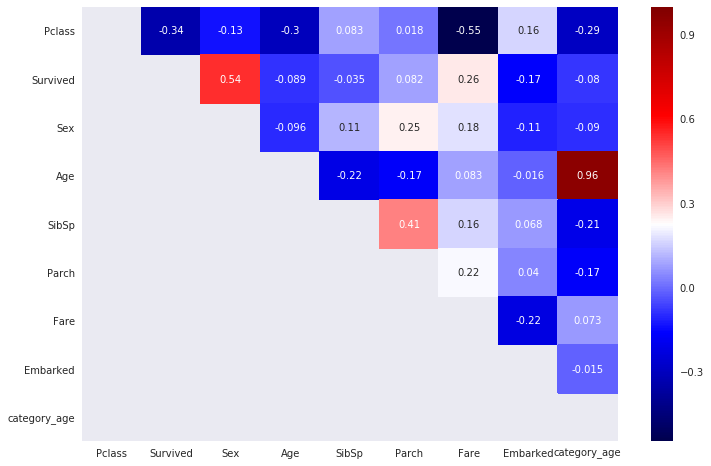

In [13]:
train_corr = clean_train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(train_corr, mask=np.tril(np.ones(train_corr.shape)), annot=True, cmap='seismic')

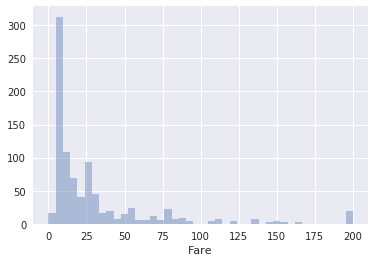

In [14]:
sns.distplot(clean_train_df['Fare'].clip(0, 200), kde=False, hist=True)

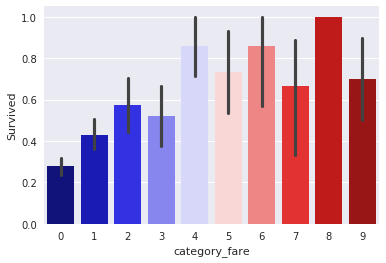

In [15]:
clean_train_df['category_fare'] = pd.cut(clean_train_df['Fare'].clip(0, 200), bins=10, labels=False)
sns.barplot(x="category_fare", y="Survived", data=clean_train_df, palette='seismic')

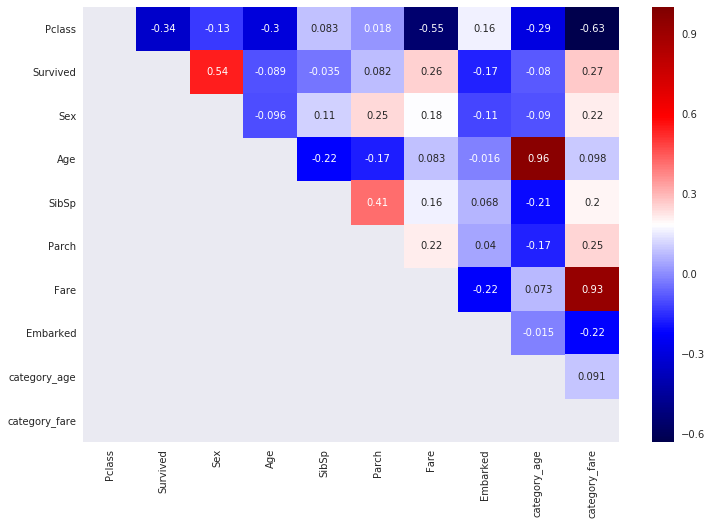

In [16]:
train_corr = clean_train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(train_corr, mask=np.tril(np.ones(train_corr.shape)), annot=True, cmap='seismic')

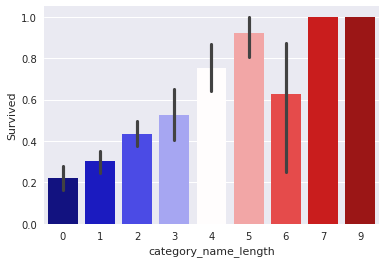

In [17]:
clean_train_df['category_name_length'] = pd.cut(clean_train_df['Name'].map(len), bins=10, labels=False)
sns.barplot(x="category_name_length", y="Survived", data=clean_train_df, palette='seismic')

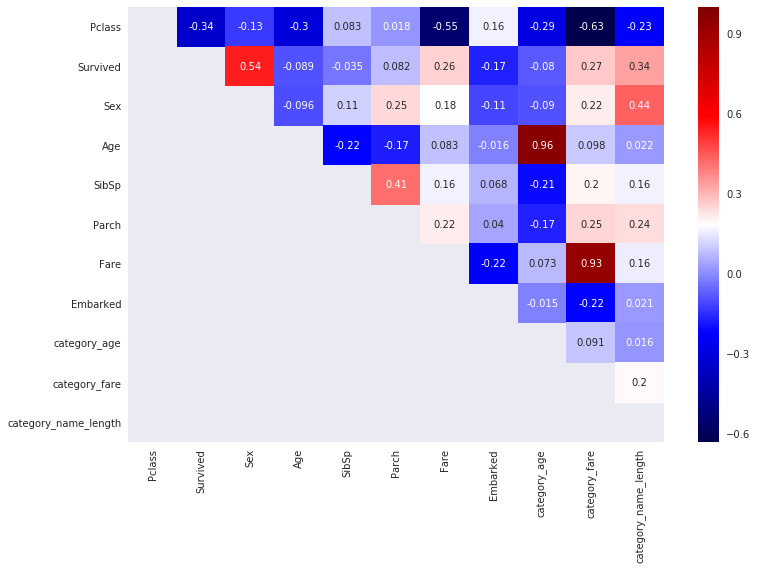

In [18]:
train_corr = clean_train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(train_corr, mask=np.tril(np.ones(train_corr.shape)), annot=True, cmap='seismic')

# Prepare the data for training

In [25]:
from sklearn.model_selection import train_test_split

In [24]:
X = clean_train_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'category_age', 'category_fare', 'category_name_length']]
y = clean_train_df['Survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Trying out a few different classifiers

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [36]:
classifiers = [
    ('KNeighborsClassifier', KNeighborsClassifier(3)),
    ('SVC_linear', SVC(kernel="linear", C=0.025)),
    ('SVC', SVC(gamma=2, C=1)),
    ('GaussianProcessClassifier', GaussianProcessClassifier(1.0 * RBF(1.0))),
    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=5)),
    ('RandomForestClassifier', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ('MLPClassifier', MLPClassifier(alpha=1)),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GaussianNB', GaussianNB()),
    ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis())]

In [37]:
for name, cls in classifiers:
    cls.fit(X_train, y_train)
    score = cls.score(X_test, y_test)
    print(f'{name}: {score}')

KNeighborsClassifier: 0.7966101694915254
SVC_linear: 0.8135593220338984
SVC: 0.7728813559322034
GaussianProcessClassifier: 0.8406779661016949
DecisionTreeClassifier: 0.823728813559322
RandomForestClassifier: 0.8203389830508474
MLPClassifier: 0.823728813559322
AdaBoostClassifier: 0.8
GaussianNB: 0.8135593220338984
QuadraticDiscriminantAnalysis: 0.8372881355932204


In [38]:
voting = VotingClassifier(classifiers)
voting.fit(X_train, y_train)
voting.score(X_test, y_test)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8406779661016949